Abigail Tucker:  
ajt0114  
903869074

# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
paste your banner id and verification code here...

======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          903869074
verification code:  5a18e4098b61
======================================================================


```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2578 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1003,2025-11-14 06:10:00,Campus,113,1.0,3.65,Credit,True
1,1005,2025-11-14 06:23:00,Downtown,105,1.0,4.45,Credit,True
2,1004,2025-11-14 06:28:00,Campus,101,1.0,2.54,Cash,False
3,1002,2025-11-14 06:31:00,Campus,103,1.0,4.43,Mobile,False
4,1000,2025-11-14 06:33:00,Suburb,108,1.0,2.69,Cash,False


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [3]:
# Task 1: use isna(), nunique(), min/max on timestamp

# Count missing values per column
missing_count = sales.isna().sum()  

print("Data Missing in Sales Dataset:")
print(missing_count)

# Extracting unique product IDs 
unique_sales_ids = sales['product_id'].nunique()
unique_products_ids = products['product_id'].nunique()

print("\nUnique product IDs in sales:", unique_sales_ids)
print("Product IDs in Catalog:", unique_products_ids)

#Extracting earliest and latest timestamp values 
earliest = sales['timestamp'].min()
latest = sales['timestamp'].max()

print("\nEarliest Sale:", earliest.date(), earliest.time())
print("Latest Sale:", latest.date(), latest.time())


Data Missing in Sales Dataset:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          7
revenue           4
payment_method    0
loyalty_member    0
dtype: int64

Unique product IDs in sales: 21
Product IDs in Catalog: 18

Earliest Sale: 2025-11-14 06:10:00
Latest Sale: 2025-11-27 21:27:00


##### Answers to Task 1 Questions 
1. The quality column has 7 missing values, and the revenue column has 4 missing values
2. The sales dataset has 21 unique product IDs, while the catalog shows only 18 unique product IDs. This tells me there is a problem with the product IDs in the sales dataset, and that some may be invalid.
3. The earliest sale in the data set occurred on November 14, 2025, at 6:10 AM, and the last sale in the data set occurred on November 27, at 9:27 PM.

## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [4]:
# Task 2: use pd.merge() with appropriate join type

# Merge sales with product information using a left join 
sales_products = pd.merge(sales, products, on='product_id', how='left')

sales_products.head()


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1003,2025-11-14 06:10:00,Campus,113,1.0,3.65,Credit,True,Scone,Pastry,1.1
1,1005,2025-11-14 06:23:00,Downtown,105,1.0,4.45,Credit,True,Cold Brew,Coffee,1.5
2,1004,2025-11-14 06:28:00,Campus,101,1.0,2.54,Cash,False,Espresso,Coffee,1.2
3,1002,2025-11-14 06:31:00,Campus,103,1.0,4.43,Mobile,False,Latte,Coffee,1.9
4,1000,2025-11-14 06:33:00,Suburb,108,1.0,2.69,Cash,False,Chai Latte,Tea,1.2


##### Explanation/Reasoning for Task 2: 
A left join was used to retain all sales data and add product information (name, category, and cost) to the matching rows for each product ID (the only column in common between the data sets). Any non-matching rows will be filled in with NaN. This preserves all the data during the merge and allows for visualization before values are dropped. 

## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [5]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs

# Comparing the shape of the merged data with the original sales data
print("Merged Data Shape:", sales_products.shape)
print("Orginal Sales Shape:", sales.shape)

# Identifying sales with any missing product details at the row level
row_missing_mask = sales_products.loc[:, ['name', 'category', 'cost']].isna().any(axis=1)
print("\nNumber of Rows Missing Data:", row_missing_mask.sum())

# Extracting product ID for rows with missing product details 
missing_product_ids = sales_products.loc[row_missing_mask, 'product_id']

print("\nProduct IDs with Missing Product Data:") 
print(missing_product_ids.unique())

Merged Data Shape: (2578, 11)
Orginal Sales Shape: (2578, 8)

Number of Rows Missing Data: 11

Product IDs with Missing Product Data:
[199 201 200]


##### Answers/Explanation for Task 3
1. The original DataFrame was 2578, 8, and I added 3 columns. I would expect the merged data to be 2578, 11, and it is. This indicates that the merge was successful and did not drop any data from the original DataFrame.
2. There appear to be 11 rows with missing product data. This is not surprising, given the product ID mismatch found before the merge.
3. The product IDs that are causing the problem are 199, 201, and 200, which are missing from the product catalog data set. This could be a store that sold a special product without an existing code, as they do not appear to have recorded the product ID incorrectly. 

## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [6]:
# Task 4: create profit column, then groupby with .agg()

# Calculate and add a column for the profit of each sale 
sales_products['profit'] = (sales_products['revenue'] - 
                            (sales_products['cost'] * sales_products['quantity']))
print("Profit Column Check:")
print(sales_products[['profit', 'revenue', 'cost', 'quantity']].head(2))

# Summarizing total profit by product category with sale counts 
profit_summary = (sales_products
    .groupby('category')
    .agg(total_profit=('profit', 'sum'),
         sale_count=('product_id', 'count')))

#sorting categories 
profit_summary = profit_summary.sort_values('total_profit', ascending=False)

# formatting results table 
profit_summary.style.format({'total_profit': '${:,.2f}'})


Profit Column Check:
   profit  revenue  cost  quantity
0    2.55     3.65   1.1       1.0
1    2.95     4.45   1.5       1.0


,total_profit,sale_count
category,,
Sandwich,"$3,914.57",566
Coffee,"$2,190.18",917
Pastry,"$1,443.71",493
Tea,$871.02,591


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [7]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

# Summarizing profit by category and location 
category_location_summary = (sales_products
    .groupby(['category', 'location'])
    .agg({'profit':  ['sum', 'mean'], 
          'product_id': 'count'})
    .reset_index())

# adding clean column names to results table 
category_location_summary.columns = ['category', 'location', 'total_profit', 'avg_profit_sale', 'sale_count']

# sorting categories
category_location_summary = category_location_summary.sort_values('total_profit', ascending=False)

# formatting results table 
category_location_summary.style.format({'total_profit': '${:,.2f}', 'avg_profit_sale': '${:,.2f}'})


,category,location,total_profit,avg_profit_sale,sale_count
7,Sandwich,Downtown,"$2,307.86",$8.30,278
1,Coffee,Downtown,"$1,044.13",$2.96,355
0,Coffee,Campus,$995.56,$2.00,501
8,Sandwich,Suburb,$917.65,$5.92,155
6,Sandwich,Campus,$689.06,$5.22,133
4,Pastry,Downtown,$584.39,$3.48,169
3,Pastry,Campus,$541.54,$2.47,219
10,Tea,Downtown,$351.02,$1.98,178
11,Tea,Suburb,$327.96,$1.35,244
5,Pastry,Suburb,$317.78,$3.06,105


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

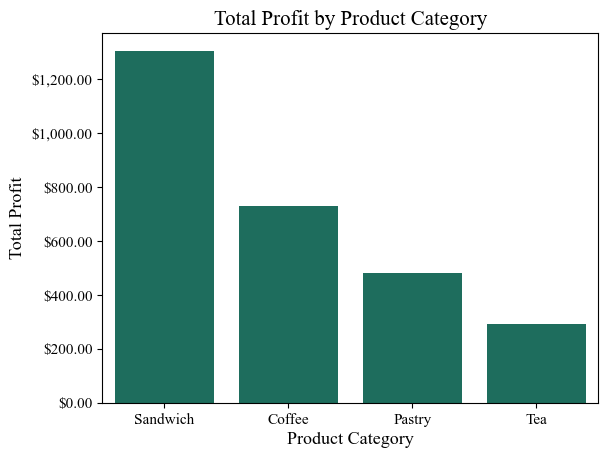

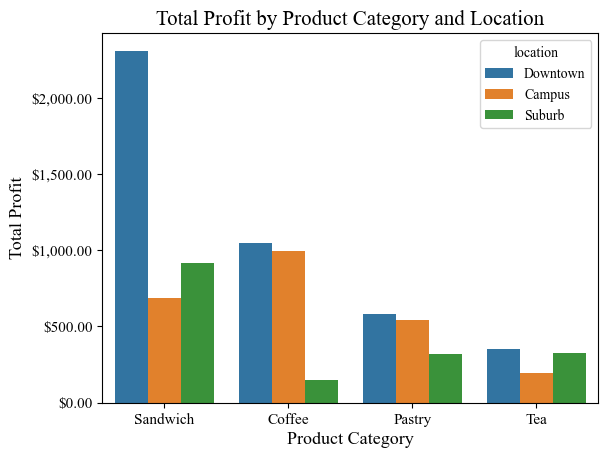

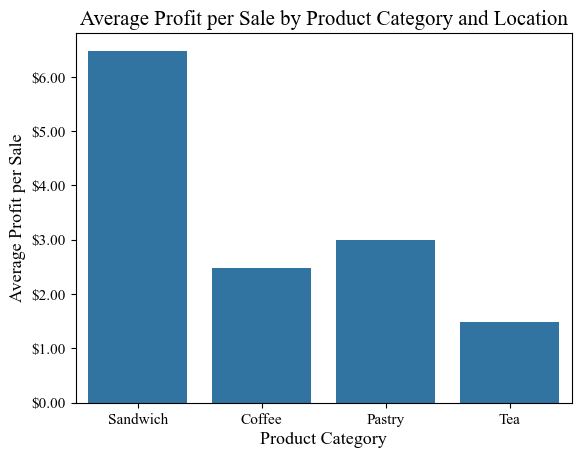

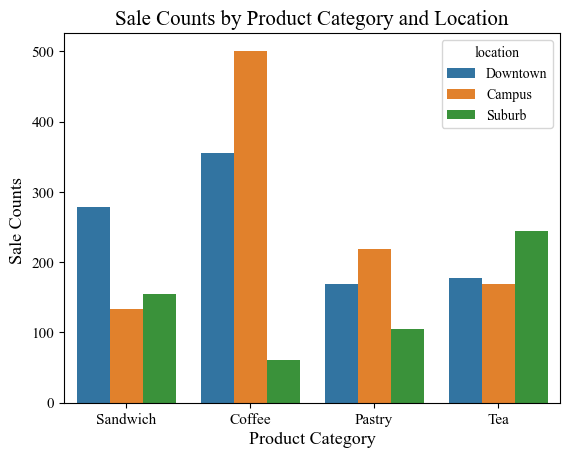

In [8]:
# Task 6: use sns.barplot() with aggregated data

#setting chat font 
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Times New Roman"]
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11

# Creating profit by category barchart
sns.barplot(data=category_location_summary, 
            x='category', 
            y='total_profit', 
            errorbar=None, 
            color='#117A65')

# adding title and labels 
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
ax = plt.gca()
ax.yaxis.set_major_formatter("${x:,.2f}")
plt.show()


# Creating profit by category and location barchart
sns.barplot(data=category_location_summary, 
            x='category', 
            y='total_profit', 
            errorbar=None,
            hue='location')

# adding title and labels 
plt.title('Total Profit by Product Category and Location')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
ax = plt.gca()
ax.yaxis.set_major_formatter("${x:,.2f}")
plt.show()

# Creating profit per sale by category barchart
sns.barplot(data=category_location_summary, 
            x='category', 
            y='avg_profit_sale', 
            errorbar=None, )

# adding title and labels 
plt.title('Average Profit per Sale by Product Category and Location')
plt.xlabel('Product Category')
plt.ylabel('Average Profit per Sale')
ax = plt.gca()
ax.yaxis.set_major_formatter("${x:,.2f}")
plt.show()

# Creating sale count by category and location barchart
sns.barplot(data=category_location_summary, 
            x='category', 
            y='sale_count', 
            errorbar=None, 
            hue='location')

# adding title and labels 
plt.title('Sale Counts by Product Category and Location')
plt.xlabel('Product Category')
plt.ylabel('Sale Counts ')
plt.show()

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

1. If you did not verify the merge as done in step 3 and continued with the data analysis, you run the risk of completing a study on data that is invalid. Worse is making decisions based on invalid analysis. Data can merge in unexpected ways, dropping or adding data that was not needed or wanted, and this can affect the data spread and relationships.
2. Aggregating by category allowed us to see the most profitable product category, while aggregating by location and category will enable us to see if the location of the sale affects the profit. The more categories you group the data by, the more information you can get. In general, as the number of aggregations increases, so does the amount of information.
3. The data found that sandwiches produced the biggest profit for the category of food, and the downtown location generated the most profit. When you look at the average profit per sale for the location and product category, you find that sandwiches had the highest profit per sale for all locations when compared to other products. But when you look at sales volume, coffee is the most sold product at downtown and campus locations. So we know that sandwiches are the most profitable because they have a higher profit per sale, and that the downtown location mainly drives this. We also know that the most purchased product is coffee, which is primarily driven by the campus location. All of this information helps make location or product-specific decisions.
4. I would increase the price of the coffee. In two weeks, 917 coffees were sold, 1.5X the number of sandwiches, but made almost \\$2,000 less in profit. The average profit per coffee sale was about \\$2.40. If you increased the profit per sale by just \\$0.50, the total profit for coffee  would have increased by almost \\$500. You could start small by raising the price of coffee only at the campus location (where you sell the most coffee) to see how the price increase affects sales. 

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [9]:
# Bonus: Your time-based analysis here

# Creating the sale day column
sales_products['sale_day'] = sales_products['timestamp'].dt.day_name()

sales_products['sale_day'].unique()

# Summarizing profit by sales day and location 
day_location_summary = (sales_products
                        .groupby(['location', 'sale_day'])
                        .agg(total_profit=('profit', 'sum'),
                             sale_count=('product_id', 'count'))
                        .reset_index())

print("Checking Profit by Location and Weekday:")
print(day_location_summary.head().assign(total_profit=day_location_summary["total_profit"].apply(lambda v: f"${v:,.2f}")))

# Find the most profitable weekday for each location
most_profit_day = (day_location_summary
                   .sort_values(['location', 'total_profit'], ascending=[True, False])
                   .drop_duplicates('location')
                   .reset_index(drop=True))

most_profit_day.sort_values('total_profit', ascending=False).style.format({'total_profit': '${:,.2f}'}) 


Checking Profit by Location and Weekday:
  location  sale_day total_profit  sale_count
0   Campus    Friday      $591.78         241
1   Campus    Monday      $467.86         189
2   Campus  Saturday       $91.38          34
3   Campus    Sunday       $59.51          27
4   Campus  Thursday      $428.25         191


,location,sale_day,total_profit,sale_count
1,Downtown,Friday,$868.25,202
0,Campus,Friday,$591.78,241
2,Suburb,Sunday,$344.67,118


In [10]:
# Bonus: Your time-based analysis here continued 

# Summarizing profit by sales day, location, and product category 
cat_loc_day_summary = (sales_products
                        .groupby(['location', 'category', 'sale_day'])
                        .agg(total_profit=('profit', 'sum'),
                             sale_count=('product_id', 'count'))
                        .reset_index())

print("Checking Profit by Location, Weekday, and Product Category:")
print(cat_loc_day_summary.head().assign(total_profit=cat_loc_day_summary["total_profit"].apply(lambda v: f"${v:,.2f}")))

# Find the most profitable product for each location and weekday
most_profit_cat = (cat_loc_day_summary
                   .sort_values(['location', 'category', 'total_profit'], ascending=[True,True, False])
                   .drop_duplicates(['category', 'location'])
                   .reset_index(drop=True))

most_profit_cat.style.format({'total_profit': '${:,.2f}'})

Checking Profit by Location, Weekday, and Product Category:
  location category  sale_day total_profit  sale_count
0   Campus   Coffee    Friday      $237.93         115
1   Campus   Coffee    Monday      $186.08          97
2   Campus   Coffee  Saturday       $33.61          17
3   Campus   Coffee    Sunday       $25.41          13
4   Campus   Coffee  Thursday      $185.17          95


,location,category,sale_day,total_profit,sale_count
0,Campus,Coffee,Friday,$237.93,115
1,Campus,Pastry,Friday,$149.03,56
2,Campus,Sandwich,Friday,$167.69,32
3,Campus,Tea,Wednesday,$51.88,38
4,Downtown,Coffee,Monday,$239.75,81
5,Downtown,Pastry,Tuesday,$122.33,35
6,Downtown,Sandwich,Friday,$474.17,60
7,Downtown,Tea,Tuesday,$99.70,44
8,Suburb,Coffee,Sunday,$41.36,16
9,Suburb,Pastry,Wednesday,$68.67,22


### Your Findings

##### *Bonus findings here*  
The questions I am going to answer:  
Which day(s) are most profitable for each location? & How do profitable days vary by product category for each location? 

The most profitable weekday for each location:
* Campus &rarr; Friday
* Downtown &rarr; Friday
* Suburb &rarr; Sunday

When looking at how profitable weekdays change when you account for product category at each location, you find there is variability in what is the most profitable weekday. This offers insights into when each product is most popular at each location and can help guide stocking decisions and, potentially, operational hours and staffing times. 
* For the Campus location:
    * Coffee &rarr; Friday is the most profitable day 
    *  Pastry &rarr; Friday is the most profitable day
    *  Sandwich &rarr; Friday is the most profitable day
    *  Tea &rarr; Wednesday is the most profitable day
* For the Downtown location:
    * Coffee &rarr; Monday is the most profitable day
    * Pastry &rarr; Tuesday is the most profitable day
    * Sandwich &rarr; Friday is the most profitable day
    * Tea &rarr; Tuesday is the most profitable day
* For the Suburb location:
    * Coffee &rarr; Sunday is the most profitable day
    * Pastry &rarr; Wednesday is the most profitable day
    * Sandwich &rarr; Sunday is the most profitable day
    * Tea &rarr; Saturday is the most profitable day

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.

##### AI Usage
* Chat GPT
    * Code Building
    * Debugging
    * Understanding Code
    * Code fromat (Best Practices)